In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10156551,18375,6,1,95000.0,2,1,21.45,3,17,28,1,3.0
1,10115057,4000,3,4,-1.0,2,2,21.64,0,18,33,0,2.0
2,10030395,15000,10,1,83000.0,2,2,22.90,3,11,44,1,3.0
3,10158544,27500,10,0,100000.0,1,2,9.66,0,5,14,1,2.0
4,10117658,9450,-1,5,28000.0,0,1,34.89,1,9,24,0,2.0


# predict interest rate

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131447 entries, 0 to 131446
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                131447 non-null  int64  
 1   Loan_Amount_Requested  131447 non-null  int64  
 2   Length_Employed        131447 non-null  int64  
 3   Home_Owner             131447 non-null  int64  
 4   Annual_Income          131447 non-null  float64
 5   Income_Verified        131447 non-null  int64  
 6   Purpose_Of_Loan        131447 non-null  int64  
 7   Debt_To_Income         131447 non-null  float64
 8   Inquiries_Last_6Mo     131447 non-null  int64  
 9   Number_Open_Accounts   131447 non-null  int64  
 10  Total_Accounts         131447 non-null  int64  
 11  Gender                 131447 non-null  int64  
 12  Interest_Rate          131447 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 13.0 MB


In [6]:
df['Home_Owner'].value_counts()   # Number of homes the borrower owns

0    56237
5    44968
1    20236
4     9956
3       41
2        9
Name: Home_Owner, dtype: int64

/home/harsh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Occurance in %')

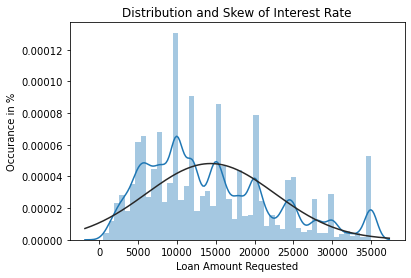

In [7]:
sns.distplot(df['Loan_Amount_Requested'], fit=norm)
plt.title("Distribution and Skew of Interest Rate")
plt.xlabel("Loan Amount Requested")
plt.ylabel("Occurance in %")

In [8]:
df['Length_Employed'].value_counts()  # Time in years of employment of the borrower

 10    42275
 2     11685
 3     10400
 0     10187
 5      8662
 1      8313
 4      7812
 7      7515
 6      7330
 8      6302
-1      5892
 9      5074
Name: Length_Employed, dtype: int64

#### > Most people having employement length near 10 years wait till they have 10 years of employement to take a loan

In [9]:
df['Annual_Income'].value_counts()  # Annual Income in rupees of the borrower

-1.00        19262
 60000.00     4418
 50000.00     3846
 65000.00     3215
 40000.00     3099
             ...  
 41806.00        1
 35297.60        1
 59712.94        1
 42550.00        1
 40397.00        1
Name: Annual_Income, Length: 10273, dtype: int64

In [10]:
df['Income_Verified'].value_counts()  # Number of Verified Sources of Income

0    47455
1    42352
2    41640
Name: Income_Verified, dtype: int64

In [11]:
df['Purpose_Of_Loan'].value_counts()    # Encoded identifier for the purpose of the loan

2     77795
1     29317
4      7338
9      6661
6      2732
11     1920
0      1496
7      1235
8       773
12      670
13      659
5       658
3       101
10       92
Name: Purpose_Of_Loan, dtype: int64

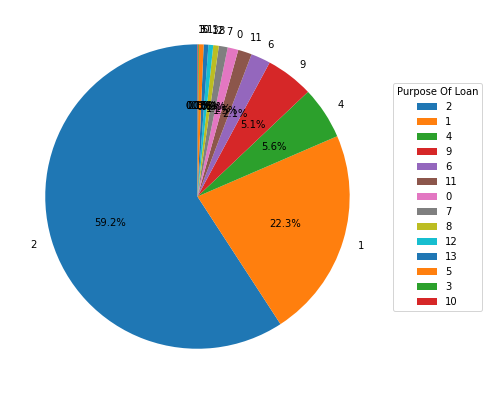

In [12]:
a= df['Purpose_Of_Loan'].value_counts()
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotext = ax.pie(a, labels = a.index, autopct='%1.1f%%',startangle = 90) 
  
ax.legend(wedges, a.index, 
          title ="Purpose Of Loan", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

#### > more than 80% of people have taken loan for encoded purpose 1 or 2 from which 60% for encoded purpose 2

0.0    91
Name: Debt_To_Income, dtype: int64
0    1
Name: Home_Owner, dtype: int64


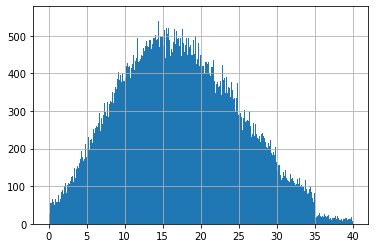

In [13]:
df['Debt_To_Income'].hist(bins = 500)  # Total existing debt to Income ratio of the borrower
print(df['Debt_To_Income'][df['Debt_To_Income']==0].value_counts())
print(df['Home_Owner'][(df['Debt_To_Income']==0) & (df['Annual_Income']==0)].value_counts())

#### 90 people are debt free and one of them for sure hasnt taken any loan before because that person doesnt own any house neither has an income

In [14]:
df['Inquiries_Last_6Mo'].value_counts()  # Number of inquiries made by the borrower regarding loans in the last 6 months

0    68562
1    36905
2    16245
3     7051
4     1790
5      615
6      256
7       16
8        7
Name: Inquiries_Last_6Mo, dtype: int64

<AxesSubplot:>

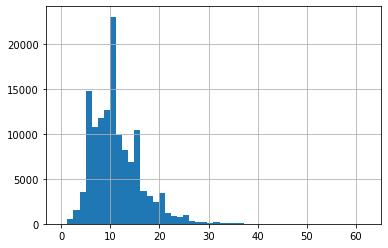

In [15]:
df['Number_Open_Accounts'].hist(bins = 50)  # Number of open bank accounts of borrower

count    131447.000000
mean         25.041895
std          11.569347
min           2.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: Total_Accounts, dtype: float64


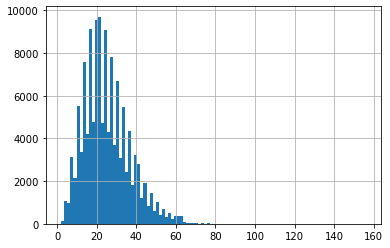

In [16]:
df['Total_Accounts'].hist(bins = 100)   # Total number of bank accounts of the borrower
print(df['Total_Accounts'].describe())

#### Every person applying for loan atleast owns one account

In [17]:
df['Gender'].value_counts()

1    93747
0    37700
Name: Gender, dtype: int64

In [18]:
df['Interest_Rate'].value_counts()  # "Interest rate group (1: Low, 2: Average, 3:High)"

2.0    56606
3.0    47698
1.0    27143
Name: Interest_Rate, dtype: int64

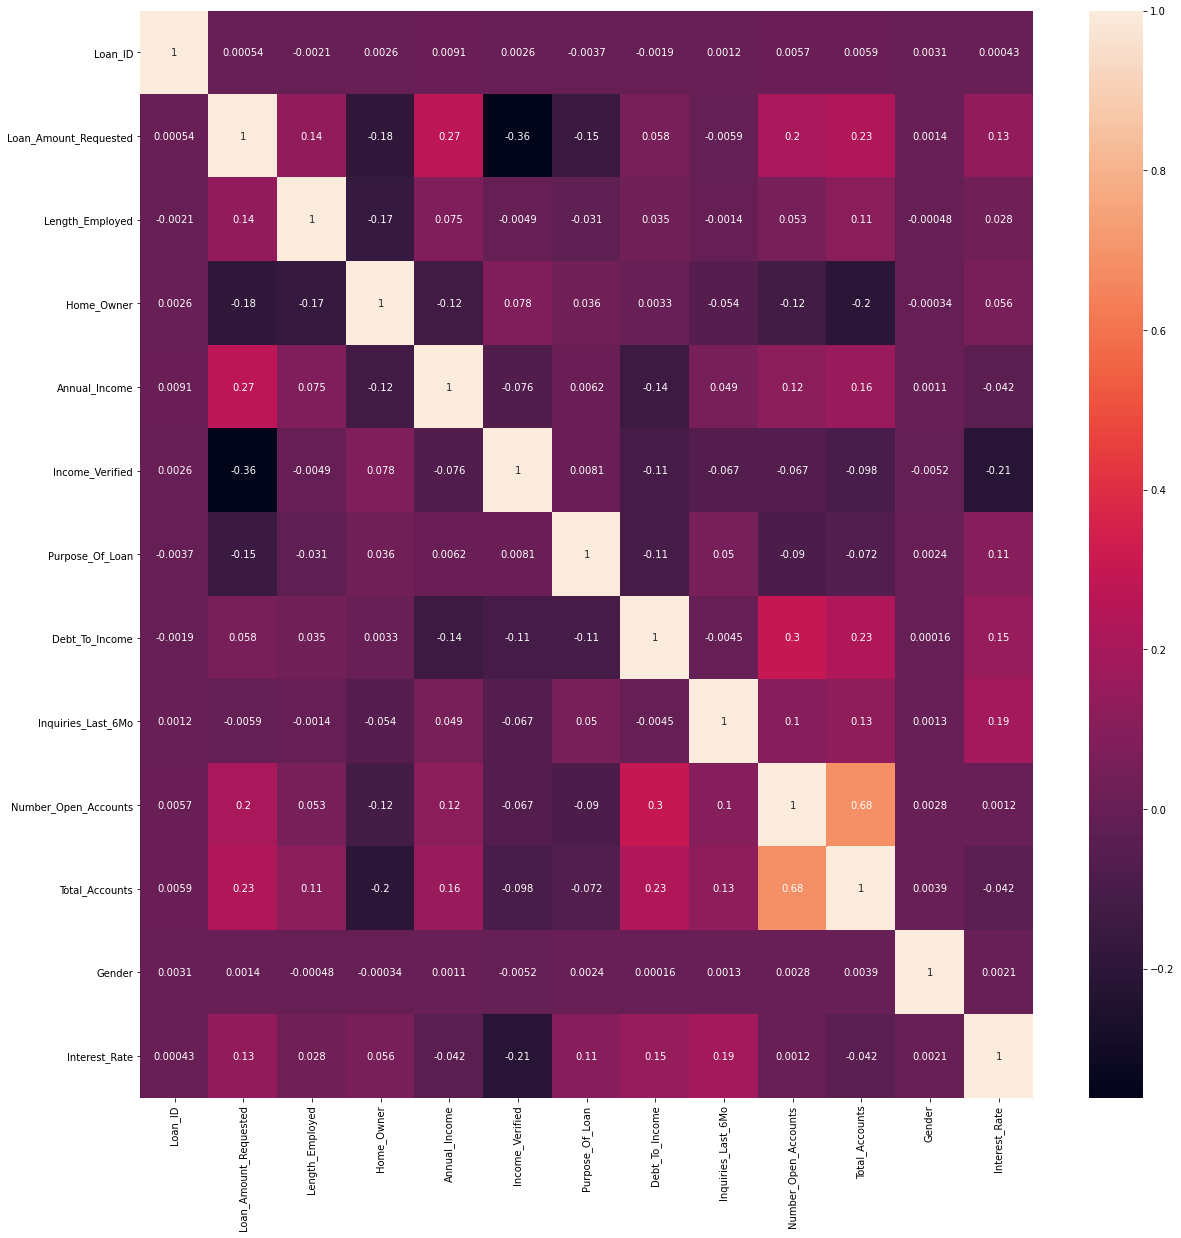

In [19]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### > Interest Rate is negatively co-related to Income Verified which shows people having less income verified have more interest rate
#### People having more Annual Income have applied for bigger loan.
#### > People having more Debt_To_Income have generally more open accounts which is explainable as they have debts on them because of using open accounts
#### > Interest Rate is bigger for people having asked more inquiries because multiple credit inquiries  have an adverse impact on consumer credit scores which is a factor in determining interest rate.

### Adding missing values

#### > Annual income of a person is most co-related to the loan amount requested according to the heatmap (more correlated)

In [20]:
index = df['Loan_Amount_Requested'][df['Annual_Income']==-1].value_counts().index
values = []
for i in index:
    size_count = df['Annual_Income'][(df['Loan_Amount_Requested']==i)& (df['Annual_Income']!=-1)].value_counts()
    d=0
    for i in size_count.index: # to fill the data not given
        d+= size_count.get(key=i)*i
        e = d/size_count.sum()
    values.append(e)
    
avg = dict(zip(index,values))
def weighted_avg(x):
    if df['Annual_Income'][x] == -1:
        return avg[df['Loan_Amount_Requested'][x]]
    else:
        return df['Annual_Income'][x]
    

df['_Annual_Income'] = pd.Series(np.arange(len(df))).apply(lambda x: weighted_avg(x))

In [21]:
df['Length_Employed'][df['_Annual_Income']==0].value_counts()

-1    878
Name: Length_Employed, dtype: int64

#### > there were 878 people who didnt have any income and -1 as length employed and there are many people who have not completed 1 year of employement , so gave 0 for all the people having -1 as length employed

In [22]:
df['_Length_Employed'] = df['Length_Employed'].apply(lambda x: 0 if x==-1 else x)

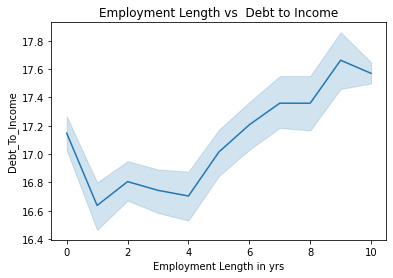

In [23]:
sns.lineplot(x=df['_Length_Employed'], y=df['Debt_To_Income'])
plt.title("Employment Length vs  Debt to Income")
plt.xlabel("Employment Length in yrs")
plt.ylabel("Debt_To_Income")
plt.show()

#### >According to graph debt to income increases with years of employement and is also high for 0 years of employement

#### > there are people having 0 years of employement and still having employement which  have two meanings, first is the person is newly appointed and has employement of less than 1 year and second is the person is a businessman or is a landlord(people having 4 or 5 houses).
#### > people having no employement, income and no house and still are applyig for loan , maybe they are starting a business based on the loan money

In [24]:
df['Income_Verified'][(df['_Annual_Income']==0)].value_counts()

0    653
1    193
2     32
Name: Income_Verified, dtype: int64

#### > there are people having no annual income  and still have income verified to get low interest rate.

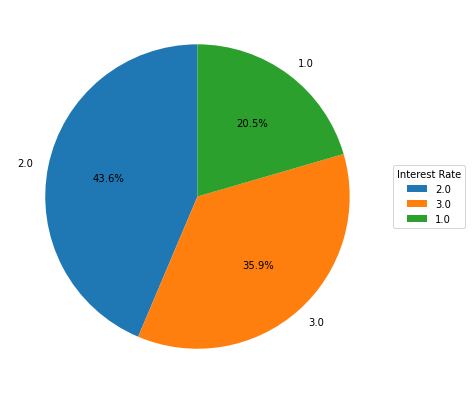

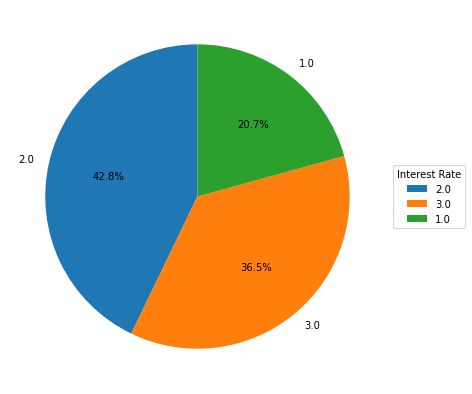

In [25]:
a= df['Interest_Rate'][df['Gender']==0].value_counts()
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotext = ax.pie(a, labels = a.index, autopct='%1.1f%%',startangle = 90) 
  
ax.legend(wedges, a.index, 
          title ="Interest Rate", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

a= df['Interest_Rate'][df['Gender']==1].value_counts()
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotext = ax.pie(a, labels = a.index, autopct='%1.1f%%',startangle = 90) 
  
ax.legend(wedges, a.index, 
          title ="Interest Rate", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

#### > Gender is not co-related to any other feature as seen in the heatmap and the stratergy to take a  loan is independent of gender.

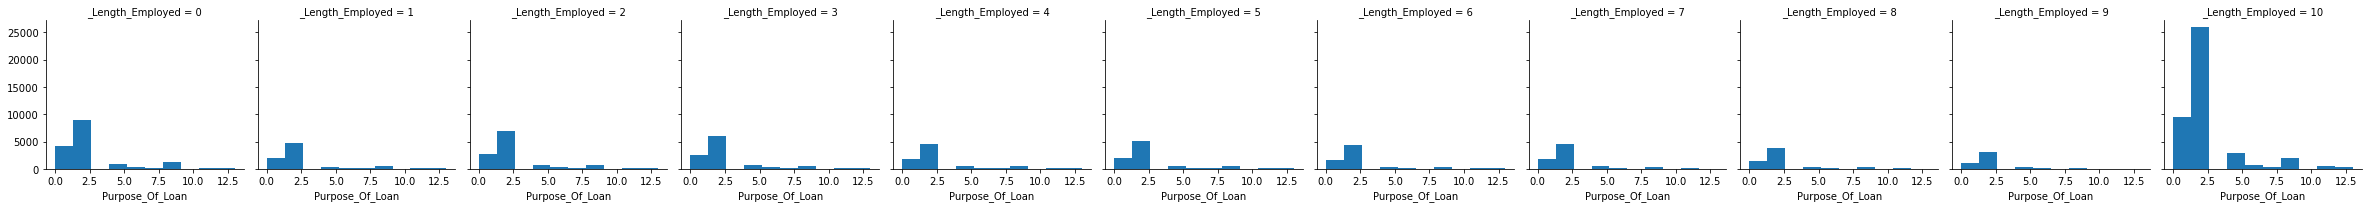

In [26]:
g = sns.FacetGrid(df, col='_Length_Employed')
g.map(plt.hist,'Purpose_Of_Loan')

In [27]:
# Multiplying Debt_To_Income with annual income gives the total debt on a person at current
def debt(x):
    return df['_Annual_Income'][x]*df['Debt_To_Income'][x]
df['Debt'] = pd.Series(np.arange(len(df))).apply(lambda x: debt(x))

In [28]:
df['Debt'].describe()

count    1.314470e+05
mean     1.181751e+06
std      7.665246e+05
min      0.000000e+00
25%      6.594638e+05
50%      1.048733e+06
75%      1.542280e+06
max      2.874150e+07
Name: Debt, dtype: float64

In [29]:
# Defining a score variable which calculates the assets of a person, given different values to different variables, Total_Accounts-1, Income_Verified-2, Home_Owner-3 because owning a house has more value than having an account.
def asset_score(x):
    return df['Total_Accounts'][x] + df['Income_Verified'][x]*2 + df['Home_Owner'][x]*3
df['Asset_Score'] = pd.Series(np.arange(len(df))).apply(lambda x: asset_score(x))

In [30]:
# People generally save some ammount of their income which is generalyy 20%, but the value of the percentage wont matter much in classification algorithms
def savings(x):
    return 0.2*(df['_Annual_Income'][x]*df['_Length_Employed'][x])
df['Savings'] = pd.Series(np.arange(len(df))).apply(lambda x: savings(x))

In [31]:
# measure of how much loan amount requested is greater than that of monthly income
def income_by_loan(x):
    return df['_Annual_Income'][x]/(df['Loan_Amount_Requested'][x]*12)
 

df['Income_By_Loan'] = pd.Series(np.arange(len(df))).apply(lambda x: income_by_loan(x))

#### >the training dataset in very big and due to less features used more features were introduced 

In [32]:
df.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate', '_Annual_Income', '_Length_Employed', 'Debt',
       'Asset_Score', 'Savings', 'Income_By_Loan'],
      dtype='object')

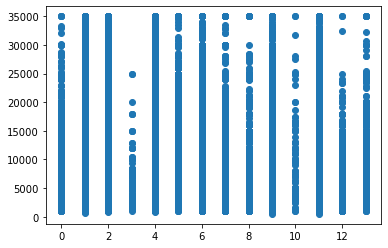

In [33]:
plt.scatter(x = df["Purpose_Of_Loan"], y=df["Loan_Amount_Requested"])

#### > Loan amount required is smallest for the encoded purpose 3 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Loan_Amount_Requested'),
  Text(1, 0, 'Debt_To_Income'),
  Text(2, 0, 'Number_Open_Accounts'),
  Text(3, 0, 'Total_Accounts'),
  Text(4, 0, '_Annual_Income'),
  Text(5, 0, '_Length_Employed'),
  Text(6, 0, 'Debt'),
  Text(7, 0, 'Asset_Score'),
  Text(8, 0, 'Savings'),
  Text(9, 0, 'Income_By_Loan')])

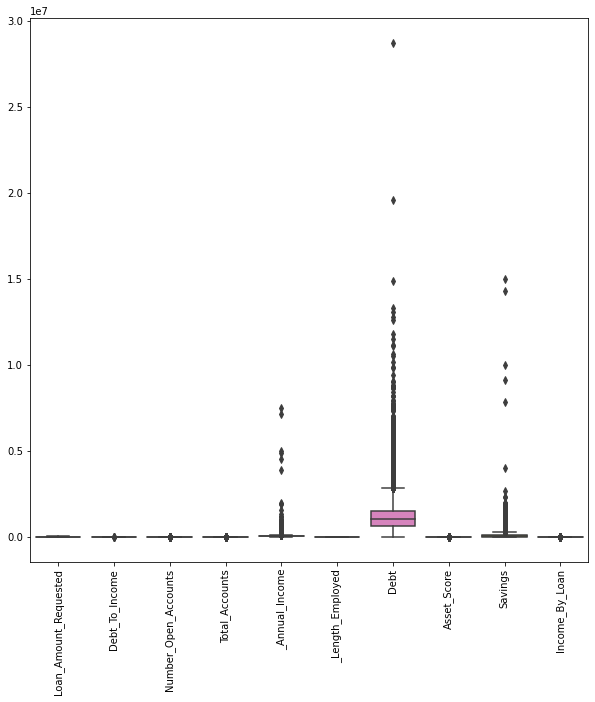

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df.drop(['Annual_Income','Length_Employed', 'Loan_ID','Home_Owner','Income_Verified', 'Purpose_Of_Loan','Inquiries_Last_6Mo','Gender','Interest_Rate'],axis=1))
plt.xticks(rotation=90)

#### > there are quite some outliners in income, debt and savings

In [35]:
_df = pd.read_csv('test.csv')

index = _df['Loan_Amount_Requested'][_df['Annual_Income']==-1].value_counts().index
values = []
for i in index:
    size_count = _df['Annual_Income'][(_df['Loan_Amount_Requested']==i)& (_df['Annual_Income']!=-1)].value_counts()
    d=0
    for i in size_count.index: # to fill the data not given
        d+= size_count.get(key=i)*i
        e = d/size_count.sum()
    values.append(e)

avg = dict(zip(index,values))
def weighted_avg(x):
    if _df['Annual_Income'][x] == -1:
        return avg[_df['Loan_Amount_Requested'][x]]
    else:
        return _df['Annual_Income'][x]
    

_df['_Annual_Income'] = pd.Series(np.arange(len(_df))).apply(lambda x: weighted_avg(x))

def length_employed(x):
    if _df['Length_Employed'][x] == -1:
        if _df['_Annual_Income'][x] == 0:
            return 0
        else:
            return 0
    else:
        return _df['Length_Employed'][x]
_df['_Length_Employed'] = pd.Series(np.arange(len(_df))).apply(lambda x: length_employed(x))



def debt(x):
    return _df['_Annual_Income'][x]*_df['Debt_To_Income'][x]
_df['Debt'] = pd.Series(np.arange(len(_df))).apply(lambda x: debt(x))

def asset_score(x):
    return _df['Total_Accounts'][x] + _df['Income_Verified'][x]*2 + _df['Home_Owner'][x]*3
_df['Asset_Score'] = pd.Series(np.arange(len(_df))).apply(lambda x: asset_score(x))

def savings(x):
    return 0.2*(_df['_Annual_Income'][x]*_df['_Length_Employed'][x])
_df['Savings'] = pd.Series(np.arange(len(_df))).apply(lambda x: savings(x))

def income_by_loan(x):
    return _df['_Annual_Income'][x]/(_df['Loan_Amount_Requested'][x]*12)
    

_df['Income_By_Loan'] = pd.Series(np.arange(len(_df))).apply(lambda x: income_by_loan(x))


#### people having more savings have applied for bigger loans
#### More the debt people have more is the asset score

## Implementing Machine Learning Models

In [36]:
X = df.drop(['Loan_ID','Length_Employed', 'Annual_Income', 'Gender','Interest_Rate'], axis = 1)
Y = df['Interest_Rate']
x = _df.drop(['Loan_ID','Length_Employed', 'Annual_Income','Gender' ], axis = 1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
X_test.columns

Index(['Loan_Amount_Requested', 'Home_Owner', 'Income_Verified',
       'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Number_Open_Accounts', 'Total_Accounts', '_Annual_Income',
       '_Length_Employed', 'Debt', 'Asset_Score', 'Savings', 'Income_By_Loan'],
      dtype='object')

#### > Ensemble methods were uesd in model for classification

In [41]:
def feature_importance(model):
    forest_importances = pd.Series(model.feature_importances_, index=X.columns)
    fig, ax = plt.subplots()
    forest_importances.plot.bar( ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

#### Different set of params are used to find the model having best accurcy on test data 

In [965]:
import xgboost as xgb
# Params on which testing was done
params = {"n_estimators": np.arange(50,100,5),
          "max_depth": [3,4, 5,6],
          "Min_child_weight": [0, 0.01,0.1, 0.5, 1, 1,5 ,2, 5],
          "gamma": [0, 0,1, 0,5 ,1],
          "subsample": [0.5,0.6,0.7,0.8],
          "nthread": [2,3,4,5,6]
         }
xgb = xgb.XGBClassifier(n_estimators = 83, max_depth = 5, min_child_weight = 2, gamma = 0, subsample = 0.8,
                       nthread = 4)
xgb.fit(X,Y)

/home/harsh/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:46:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=83, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.5702168124762267


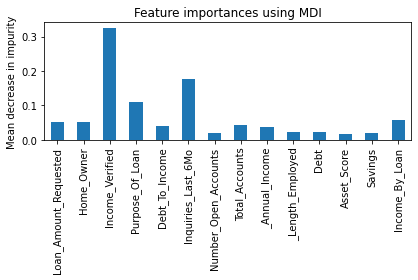

In [966]:
print(xgb.score(X_test, Y_test))
feature_importance(xgb)

In [867]:
from catboost import CatBoostClassifier
# Params on which testing was done
params = {"depth": np.arange(3,10,1),
          "random_strength": [0.01, 0.05, 0.1, 0.5, 1, 1.5]}
cat = CatBoostClassifier(depth = 5, random_strength = 0.05 )
cat.fit(X_train, Y_train)

Learning rate set to 0.100331
0:	learn: 1.0792593	total: 33.6ms	remaining: 33.6s
1:	learn: 1.0635468	total: 65.1ms	remaining: 32.5s
2:	learn: 1.0506389	total: 94.8ms	remaining: 31.5s
3:	learn: 1.0396665	total: 127ms	remaining: 31.5s
4:	learn: 1.0305767	total: 154ms	remaining: 30.7s
5:	learn: 1.0226078	total: 187ms	remaining: 30.9s
6:	learn: 1.0157868	total: 225ms	remaining: 31.9s
7:	learn: 1.0097285	total: 260ms	remaining: 32.3s
8:	learn: 1.0042173	total: 288ms	remaining: 31.7s
9:	learn: 0.9993790	total: 317ms	remaining: 31.4s
10:	learn: 0.9953158	total: 346ms	remaining: 31.1s
11:	learn: 0.9915948	total: 376ms	remaining: 31s
12:	learn: 0.9884274	total: 406ms	remaining: 30.8s
13:	learn: 0.9853488	total: 436ms	remaining: 30.7s
14:	learn: 0.9827885	total: 473ms	remaining: 31.1s
15:	learn: 0.9800925	total: 503ms	remaining: 30.9s
16:	learn: 0.9780196	total: 532ms	remaining: 30.8s
17:	learn: 0.9759760	total: 561ms	remaining: 30.6s
18:	learn: 0.9741294	total: 588ms	remaining: 30.4s
19:	learn:

162:	learn: 0.9345031	total: 5.09s	remaining: 26.2s
163:	learn: 0.9344398	total: 5.12s	remaining: 26.1s
164:	learn: 0.9343865	total: 5.16s	remaining: 26.1s
165:	learn: 0.9343252	total: 5.24s	remaining: 26.3s
166:	learn: 0.9342711	total: 5.34s	remaining: 26.7s
167:	learn: 0.9341722	total: 5.41s	remaining: 26.8s
168:	learn: 0.9341310	total: 5.44s	remaining: 26.8s
169:	learn: 0.9340631	total: 5.47s	remaining: 26.7s
170:	learn: 0.9340071	total: 5.5s	remaining: 26.7s
171:	learn: 0.9339644	total: 5.53s	remaining: 26.6s
172:	learn: 0.9338956	total: 5.57s	remaining: 26.6s
173:	learn: 0.9338127	total: 5.6s	remaining: 26.6s
174:	learn: 0.9337285	total: 5.63s	remaining: 26.6s
175:	learn: 0.9336755	total: 5.66s	remaining: 26.5s
176:	learn: 0.9336259	total: 5.69s	remaining: 26.5s
177:	learn: 0.9335109	total: 5.73s	remaining: 26.5s
178:	learn: 0.9334553	total: 5.76s	remaining: 26.4s
179:	learn: 0.9333710	total: 5.81s	remaining: 26.5s
180:	learn: 0.9333139	total: 5.86s	remaining: 26.5s
181:	learn: 0.

324:	learn: 0.9248580	total: 10.3s	remaining: 21.5s
325:	learn: 0.9248171	total: 10.4s	remaining: 21.5s
326:	learn: 0.9247704	total: 10.4s	remaining: 21.4s
327:	learn: 0.9247160	total: 10.4s	remaining: 21.4s
328:	learn: 0.9246902	total: 10.5s	remaining: 21.4s
329:	learn: 0.9246409	total: 10.5s	remaining: 21.3s
330:	learn: 0.9246036	total: 10.5s	remaining: 21.3s
331:	learn: 0.9245742	total: 10.6s	remaining: 21.3s
332:	learn: 0.9245185	total: 10.6s	remaining: 21.2s
333:	learn: 0.9244417	total: 10.6s	remaining: 21.2s
334:	learn: 0.9244001	total: 10.7s	remaining: 21.2s
335:	learn: 0.9243408	total: 10.7s	remaining: 21.1s
336:	learn: 0.9243068	total: 10.7s	remaining: 21.1s
337:	learn: 0.9242674	total: 10.8s	remaining: 21.1s
338:	learn: 0.9242148	total: 10.8s	remaining: 21s
339:	learn: 0.9241693	total: 10.8s	remaining: 21s
340:	learn: 0.9240957	total: 10.8s	remaining: 21s
341:	learn: 0.9240325	total: 10.9s	remaining: 20.9s
342:	learn: 0.9239690	total: 10.9s	remaining: 20.9s
343:	learn: 0.9239

483:	learn: 0.9178719	total: 15.7s	remaining: 16.7s
484:	learn: 0.9178151	total: 15.7s	remaining: 16.7s
485:	learn: 0.9177833	total: 15.7s	remaining: 16.6s
486:	learn: 0.9177435	total: 15.8s	remaining: 16.6s
487:	learn: 0.9176967	total: 15.8s	remaining: 16.6s
488:	learn: 0.9176477	total: 15.8s	remaining: 16.5s
489:	learn: 0.9176021	total: 15.9s	remaining: 16.5s
490:	learn: 0.9175690	total: 15.9s	remaining: 16.5s
491:	learn: 0.9175189	total: 15.9s	remaining: 16.4s
492:	learn: 0.9174622	total: 16s	remaining: 16.4s
493:	learn: 0.9174183	total: 16s	remaining: 16.4s
494:	learn: 0.9173779	total: 16s	remaining: 16.3s
495:	learn: 0.9173240	total: 16s	remaining: 16.3s
496:	learn: 0.9172842	total: 16.1s	remaining: 16.3s
497:	learn: 0.9172332	total: 16.1s	remaining: 16.3s
498:	learn: 0.9172053	total: 16.2s	remaining: 16.2s
499:	learn: 0.9171513	total: 16.2s	remaining: 16.2s
500:	learn: 0.9171150	total: 16.2s	remaining: 16.2s
501:	learn: 0.9170559	total: 16.2s	remaining: 16.1s
502:	learn: 0.917021

646:	learn: 0.9114190	total: 21s	remaining: 11.4s
647:	learn: 0.9113902	total: 21s	remaining: 11.4s
648:	learn: 0.9113480	total: 21.1s	remaining: 11.4s
649:	learn: 0.9112609	total: 21.1s	remaining: 11.4s
650:	learn: 0.9112360	total: 21.1s	remaining: 11.3s
651:	learn: 0.9112064	total: 21.1s	remaining: 11.3s
652:	learn: 0.9111906	total: 21.2s	remaining: 11.2s
653:	learn: 0.9111682	total: 21.2s	remaining: 11.2s
654:	learn: 0.9111231	total: 21.2s	remaining: 11.2s
655:	learn: 0.9111030	total: 21.3s	remaining: 11.1s
656:	learn: 0.9110745	total: 21.3s	remaining: 11.1s
657:	learn: 0.9110382	total: 21.3s	remaining: 11.1s
658:	learn: 0.9110102	total: 21.4s	remaining: 11s
659:	learn: 0.9109731	total: 21.4s	remaining: 11s
660:	learn: 0.9109179	total: 21.4s	remaining: 11s
661:	learn: 0.9108855	total: 21.5s	remaining: 11s
662:	learn: 0.9108406	total: 21.5s	remaining: 10.9s
663:	learn: 0.9108171	total: 21.5s	remaining: 10.9s
664:	learn: 0.9107712	total: 21.5s	remaining: 10.9s
665:	learn: 0.9107231	to

808:	learn: 0.9055697	total: 26.1s	remaining: 6.15s
809:	learn: 0.9055349	total: 26.1s	remaining: 6.12s
810:	learn: 0.9055066	total: 26.1s	remaining: 6.09s
811:	learn: 0.9054741	total: 26.1s	remaining: 6.05s
812:	learn: 0.9054599	total: 26.2s	remaining: 6.02s
813:	learn: 0.9054263	total: 26.2s	remaining: 5.99s
814:	learn: 0.9053774	total: 26.2s	remaining: 5.96s
815:	learn: 0.9053475	total: 26.3s	remaining: 5.92s
816:	learn: 0.9053027	total: 26.3s	remaining: 5.89s
817:	learn: 0.9052613	total: 26.3s	remaining: 5.86s
818:	learn: 0.9052226	total: 26.4s	remaining: 5.83s
819:	learn: 0.9051729	total: 26.4s	remaining: 5.8s
820:	learn: 0.9051336	total: 26.4s	remaining: 5.76s
821:	learn: 0.9051013	total: 26.5s	remaining: 5.73s
822:	learn: 0.9050820	total: 26.5s	remaining: 5.7s
823:	learn: 0.9050313	total: 26.5s	remaining: 5.67s
824:	learn: 0.9049721	total: 26.6s	remaining: 5.63s
825:	learn: 0.9049376	total: 26.6s	remaining: 5.6s
826:	learn: 0.9048945	total: 26.6s	remaining: 5.57s
827:	learn: 0.9

973:	learn: 0.8999035	total: 31.4s	remaining: 839ms
974:	learn: 0.8998785	total: 31.5s	remaining: 807ms
975:	learn: 0.8998492	total: 31.5s	remaining: 775ms
976:	learn: 0.8998128	total: 31.5s	remaining: 743ms
977:	learn: 0.8997929	total: 31.6s	remaining: 710ms
978:	learn: 0.8997541	total: 31.6s	remaining: 678ms
979:	learn: 0.8997244	total: 31.6s	remaining: 646ms
980:	learn: 0.8997054	total: 31.7s	remaining: 613ms
981:	learn: 0.8996747	total: 31.7s	remaining: 581ms
982:	learn: 0.8996265	total: 31.7s	remaining: 549ms
983:	learn: 0.8995920	total: 31.8s	remaining: 517ms
984:	learn: 0.8995849	total: 31.8s	remaining: 484ms
985:	learn: 0.8995420	total: 31.8s	remaining: 452ms
986:	learn: 0.8995281	total: 31.9s	remaining: 420ms
987:	learn: 0.8995126	total: 31.9s	remaining: 387ms
988:	learn: 0.8994755	total: 31.9s	remaining: 355ms
989:	learn: 0.8994443	total: 32s	remaining: 323ms
990:	learn: 0.8994332	total: 32s	remaining: 291ms
991:	learn: 0.8993834	total: 32s	remaining: 258ms
992:	learn: 0.8993

0.5367820464054773


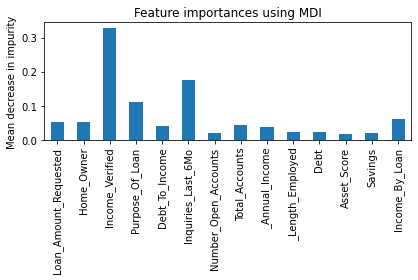

In [916]:
print(cat.score(X_test, Y_test))
feature_importance(cat)

In [39]:
import lightgbm as lgb
# Params on which testing was done
params = {"reg_alpha": [0.01, 0.05, 0.1, 0.5, 1, 1.5],
          "learning_rate": [0.01, 0.05, 0.1, 0.5, 1, 1.5],
          "application": ['regressiomn', 'binary', 'nulticlass']}
lgb = lgb.LGBMClassifier( application = 'multiclass', learning_rate = 0.1,)
lgb.fit(X_train, Y_train)

LGBMClassifier(application='multiclass')

0.5340053252187144


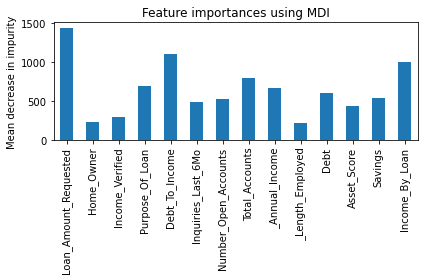

In [42]:
print(lgb.score(X_test, Y_test))
feature_importance(lgb)

In [871]:
from sklearn.ensemble import AdaBoostClassifier
# params 
params = {"n_estimators": np.arange(50,200,10),
          "learning_rate": [0.01, 0.05, 0.1, 0.5, 1, 1.5],
          "application": ['regression', 'binary', 'multiclass']}

ada = AdaBoostClassifier( n_estimators = 150)#,  learning_rate =
ada.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=150)

0.526546021662847


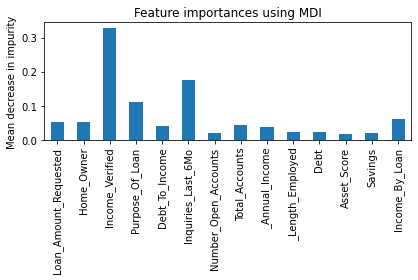

In [918]:
print(ada.score(X_train, Y_train))
feature_importance(ada)

In [875]:
from sklearn.ensemble import GradientBoostingClassifier
# params
params = {"learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5, 1, 1.5],
          "n_estimators": np.arange(50,200,10),
          "criterion": ['friedman_mse', 'mae']}


gbc = GradientBoostingClassifier(learning_rate = 0.3,  n_estimators = 150, criterion = 'friedman_mse')
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=150)

0.5360213008748573


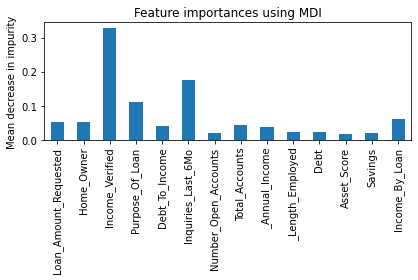

In [919]:
print(gbc.score(X_test, Y_test))
feature_importance(gbc)

In [45]:
import pickle
with open('predict_interest_rate.pkl', 'wb') as f:
    pickle.dump(lgb, f)

In [866]:
predictions = xgb.predict(x)
data = list(zip(_df['Loan_ID'], predictions)) 
predict = pd.DataFrame(data, columns = ['Loan_ID','Interest_Rate'])
predict = predict.reset_index(drop = True)
predict.to_csv('prediction.csv', index=False)

## Insights and Conclusions
#### discussed throughout the code:

##### > Most people having employement length around 10 years wait till they get 10 years employed to take a loan
##### > More than 80% of people have taken loan for encoded purpose 1 or 2 from which 60% for encoded purpose 2
##### > Every person applying for loan atleast owns an account
##### > 90 people are debt free and one of them for sure hasnt taken any loan before because that person doesnt own any house and doesnt have any income
##### > According to graph debt to income increases with years of employement and is also high for 0 years of employement
##### > Loan amount required is smallest for the encoded purpose 3 
##### > Interest Rate is negatively co-related to Income Verified which shows people having less income verified have more interest rate
##### > People having more Debt_To_Income have generally more open accounts which is explainable as they have debts on them because of using open accounts
##### > Interest Rate is bigger for people who have asked more quiries because multiple credit inquiries  have an adverse impact on consumer credit scores which is a factor in determining interest rate.
##### > There are people having 0 years of employement and still having employement which  have two meanings, first is the person is newly appointed and has employement of less than 1 year and second is the person is a businessman or is a landlord(people having 4 or 5 houses).
##### > People having no employement, income and no house and still are applyig for loan , maybe they are starting a business using the loan money 
##### > There are people having no annual income  and still have income verified on purpose to get low interest rate.
##### > Gender is not co-related to any other feature as seen in the heatmap and the strategy to take a  loan is independent of gender.
##### > People having more savings have applied for bigger loans, more the debt people have more is the asset score
##### > Best accuracy was achieved by XGBoost model
##### > Accoring to the feature importance it can be seen that varification of income, purpose of loan and inquiries made in kast 6 months are some of the major factors.
##### > The reason for low accuracy can be the less number of features provided , having outliners which are also present in test dataset and because of some datapoints which are not easily explainable like person taking a loan without earning money and owning property